In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 



Using TensorFlow backend.


In [23]:
img_width, img_height = 224, 224
  
train_data_dir = 'C:/MySql/cell/vdata/v_data/v_data/train'
validation_data_dir = 'C:/MySql/cell/vdata/v_data/v_data/test'
nb_train_samples = 400 
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [24]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [25]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
  


In [26]:
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [27]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 

In [28]:
test_datagen = ImageDataGenerator(rescale = 1. / 255) 

In [29]:
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='binary') 
  


Found 400 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='binary') 

Found 100 images belonging to 2 classes.


In [32]:
model_save = model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs, validation_data = validation_generator, 
        validation_steps = nb_validation_samples // batch_size) 
  

Epoch 1/10
25/25 [==============================] - 22s 866ms/step - loss: 0.2633 - accuracy: 0.8925 - val_loss: 0.0644 - val_accuracy: 0.8854
Epoch 2/10
25/25 [==============================] - 20s 806ms/step - loss: 0.2628 - accuracy: 0.8900 - val_loss: 0.3627 - val_accuracy: 0.8333
Epoch 3/10
25/25 [==============================] - 20s 804ms/step - loss: 0.2342 - accuracy: 0.9075 - val_loss: 0.1664 - val_accuracy: 0.8929
Epoch 4/10
25/25 [==============================] - 20s 806ms/step - loss: 0.2128 - accuracy: 0.9200 - val_loss: 0.6456 - val_accuracy: 0.9048
Epoch 5/10
25/25 [==============================] - 20s 809ms/step - loss: 0.2828 - accuracy: 0.8950 - val_loss: 0.2656 - val_accuracy: 0.8810
Epoch 6/10
25/25 [==============================] - 20s 804ms/step - loss: 0.1732 - accuracy: 0.9300 - val_loss: 0.2322 - val_accuracy: 0.8571
Epoch 7/10
25/25 [==============================] - 20s 798ms/step - loss: 0.2384 - accuracy: 0.9275 - val_loss: 0.2635 - val_accuracy: 0.8333

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


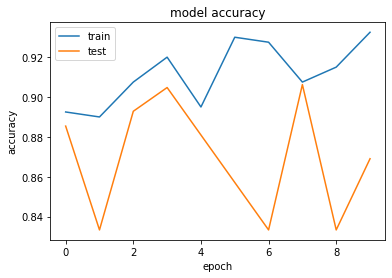

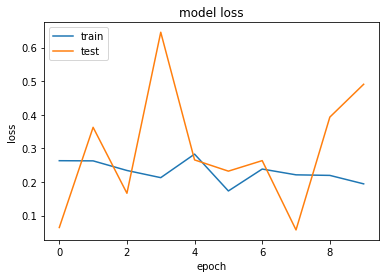

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(model_save.history.keys())
# summarize history for accuracy
plt.plot(model_save.history['accuracy'])
plt.plot(model_save.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_save.history['loss'])
plt.plot(model_save.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [36]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()


16
1.0


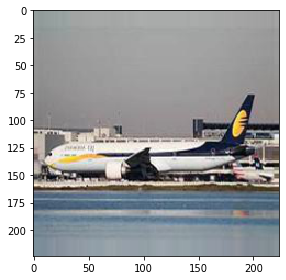

0.0


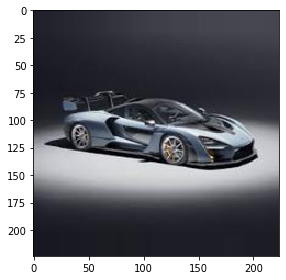

1.0


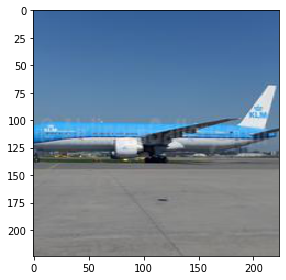

1.0


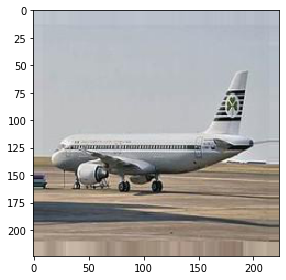

0.0


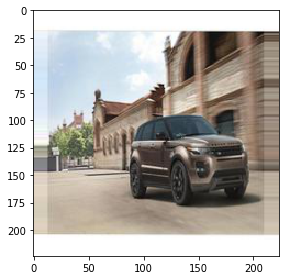

0.0


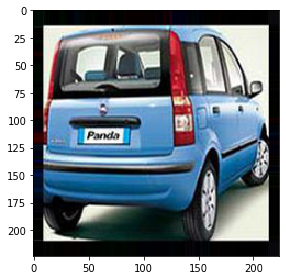

0.0


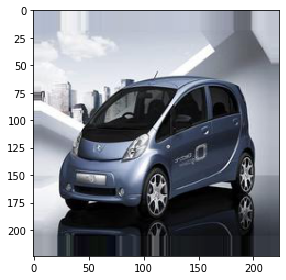

1.0


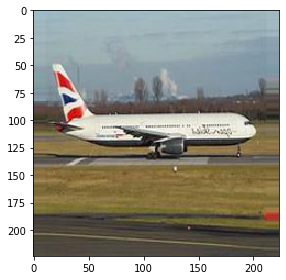

0.0


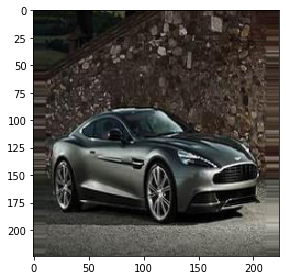

0.0


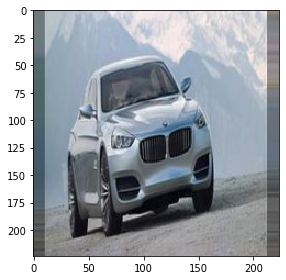

1.0


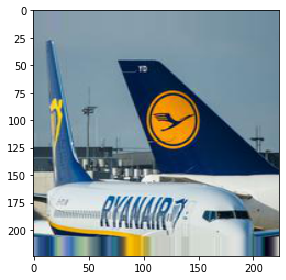

0.0


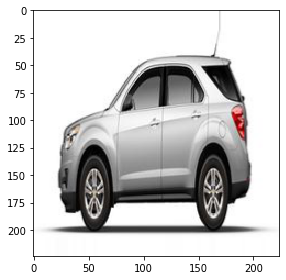

1.0


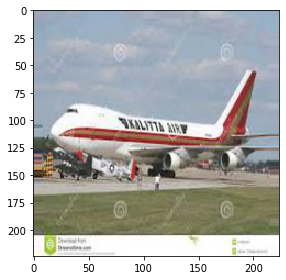

0.0


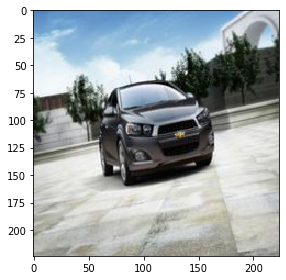

0.0


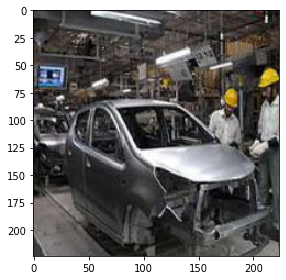

0.0


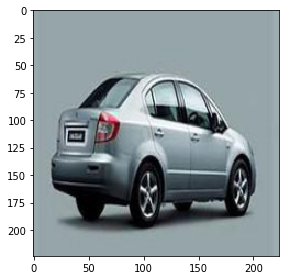

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [45]:
from os import listdir
from os.path import isfile, join
predict_dir_path='C:/MySql/cell/vdata/v_data/v_data/Test_Predict/'
output_files = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(output_files)

['18.jpg', '20.jpg', '21.jpg', '34.jpg', '37.jpg', '39.jpg', '4.jpg', '51.jpg', '54.jpg']


In [49]:
import numpy as np
from keras.preprocessing import image
car_counter = 0 
plane_counter  = 0
for file in output_files:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 1:
        print(file + ": " + 'car')
        car_counter += 1
    else:
        print(file + ": " + 'plane')
        plane_counter += 1
print("Total car :",car_counter)
print("Total planes :",plane_counter)


18.jpg: car
20.jpg: car
21.jpg: car
34.jpg: car
37.jpg: car
39.jpg: plane
4.jpg: car
51.jpg: plane
54.jpg: plane
Total car : 6
Total planes : 3


In [50]:
model.save_weights('model_saved.h5') 